In [6]:
#!pip3 install youtube-data-api

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style='white')
import numpy as np
import pandas as pd
from youtube_api import YoutubeDataApi
import json
import tqdm

# api

In [2]:
credits = !cat credits.txt
credits = credits[0]
#credits

In [3]:
yt = YoutubeDataApi(credits)

# general info

In [4]:
chan_id = yt.get_channel_id_from_user('NBA')
print(chan_id)

UCWJ2lWNubArHWmf3FIHbfcQ


In [ ]:
pls = yt.get_playlists(chan_id)
print(len(pls))
pls[:2]

In [7]:
pls_df = pd.DataFrame.from_dict(pls)
pls_df[pls_df.playlist_name.str.lower().str.contains("top plays of")]

,playlist_name,playlist_id,playlist_publish_date,playlist_n_videos,channel_id,channel_name,collection_date
9,NBA's Top Plays of the Night - 2019-20 Season,PLlVlyGVtvuVniekgwI1mQ2zPUpo1Z4qWk,2019-10-23 03:30:52,83,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,2019-12-29 16:07:31.568098
25,NBA's Top Plays of the Night - 2018-19 Season,PLlVlyGVtvuVnJ_wdbrb_PUKtndQqzU4me,2018-11-05 20:58:54,256,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,2019-12-29 16:07:31.568847
43,NBA Top Plays of the Night,PLlVlyGVtvuVkUpgWlBV44heQGeVpxFvU4,2017-11-16 00:31:21,522,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,2019-12-29 16:07:31.569660
80,2016-17 Top Plays of the Night,PLlVlyGVtvuVnAx-u38QOieyVIrMEmzuDx,2016-10-26 07:47:11,276,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,2019-12-29 16:07:32.630544
81,2016 Preseason Top Plays of the Night,PLlVlyGVtvuVmyWoH4xEB-HRUyYQJt9xVc,2016-10-08 02:14:34,19,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,2019-12-29 16:07:32.630599


In [8]:
pls_df.to_csv('playlists.csv', index=False)

In [12]:
seasons_dict = {2020: 'PLlVlyGVtvuVniekgwI1mQ2zPUpo1Z4qWk',
                2019: 'PLlVlyGVtvuVnJ_wdbrb_PUKtndQqzU4me'}

In [13]:
videos = (yt.get_videos_from_playlist_id(seasons_dict[2020])
          + yt.get_videos_from_playlist_id(seasons_dict[2019]))
print(len(videos))

339


# videos

In [17]:
videos_df = pd.DataFrame(videos)
print(videos_df.shape)
videos_df.sort_values('publish_date', inplace=True)
videos_df.to_csv('videos_since_2018.csv', index=False)
videos_df.head(10)

(339, 4)


,video_id,channel_id,publish_date,collection_date
319,mdFDFiFNdUg,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-05 20:59:14,2019-12-29 16:13:34.174690
320,WkyjUET53Dw,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-05 20:59:24,2019-12-29 16:13:34.174884
321,r2pAPk78-zs,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-05 20:59:33,2019-12-29 16:13:34.175061
322,YK91As17ixg,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-05 20:59:43,2019-12-29 16:13:34.175170
323,FI1PXg7_Ex0,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-05 20:59:57,2019-12-29 16:13:34.175275
324,_7KhBZ3VtBc,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-05 21:00:06,2019-12-29 16:13:34.175378
325,jcqut44iowU,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-05 21:00:18,2019-12-29 16:13:34.175479
326,a0CUgVuY9UE,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-05 21:00:27,2019-12-29 16:13:34.175581
327,z1BFOSaj_N0,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-05 21:00:34,2019-12-29 16:13:34.175682
328,KxUsOyPwrS8,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-05 21:00:44,2019-12-29 16:13:34.175783


In [31]:
videos_df.iloc[-1]

video_id                          _TOcgNv9W2A
channel_id           UCWJ2lWNubArHWmf3FIHbfcQ
publish_date              2019-12-28 08:59:47
collection_date    2019-12-28 14:31:14.424838
Name: 0, dtype: object

In [16]:
metas = []
for video_id in tqdm.tqdm(videos_df.video_id):
    metas.append(yt.get_video_metadata(video_id))
print(len(metas))

100%|██████████| 339/339 [01:06<00:00,  5.30it/s]

339


In [46]:
metas_df = pd.DataFrame([m for m in metas if 'video_id' in m])
print(metas_df.shape)
metas_df.to_csv('metas_since_2018.csv', index=False)
metas_df.head(10)

(337, 14)


,video_id,channel_title,channel_id,video_publish_date,video_title,video_description,video_category,video_view_count,video_comment_count,video_like_count,video_dislike_count,video_thumbnail,video_tags,collection_date
0,mdFDFiFNdUg,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-05 05:48:21,"NBA Top 10 Plays of the Night | November 4, 2018",Check out the top 10 plays of the night around...,17,620581,411,6294,231,https://i.ytimg.com/vi/mdFDFiFNdUg/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:57.305499
1,WkyjUET53Dw,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-04 05:42:23,"NBA Top 10 Plays of the Night | November 3, 2018",Check out the top 10 plays of the night around...,17,512738,309,6641,129,https://i.ytimg.com/vi/WkyjUET53Dw/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:57.508599
2,r2pAPk78-zs,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-03 06:11:31,"NBA Top 10 Plays of the Night | November 2, 2018",Check out the top 10 plays of the night around...,17,513531,300,5672,407,https://i.ytimg.com/vi/r2pAPk78-zs/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:57.741083
3,YK91As17ixg,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-02 06:18:41,"NBA Top 10 Plays of the Night | November 1, 2018",Check out the top 10 plays of the night around...,17,583258,319,5419,909,https://i.ytimg.com/vi/YK91As17ixg/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:57.919525
4,FI1PXg7_Ex0,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-01 06:33:01,"NBA Top 10 Plays of the Night | October 31, 2018",Check out the top 10 plays of the night around...,17,537942,287,5943,162,https://i.ytimg.com/vi/FI1PXg7_Ex0/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:58.100262
5,_7KhBZ3VtBc,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-10-31 04:26:01,"NBA Top 10 Plays of the Night | October 30, 2018",Check out the top 10 plays of the night around...,17,516782,391,4325,1101,https://i.ytimg.com/vi/_7KhBZ3VtBc/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:58.286061
6,jcqut44iowU,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-10-30 05:21:01,"NBA Top 10 Plays of the Night | October 29, 2018",Check out the top 10 plays of the night around...,17,553940,257,5499,143,https://i.ytimg.com/vi/jcqut44iowU/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:58.467015
7,a0CUgVuY9UE,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-10-29 04:27:31,"NBA Top 5 Plays of the Night | October 28, 2018",Check out the top 5 plays of the night around ...,17,370677,266,4518,210,https://i.ytimg.com/vi/a0CUgVuY9UE/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:58.644311
8,z1BFOSaj_N0,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-10-28 04:57:57,"NBA Top 10 Plays of the Night | October 27, 2018",Check out the top 10 plays of the night around...,17,564806,406,5363,483,https://i.ytimg.com/vi/z1BFOSaj_N0/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:58.848275
9,KxUsOyPwrS8,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-10-27 05:36:36,"NBA Top 10 Plays of the Night | October 26, 2018",Check out the top 10 plays of the night around...,17,509262,408,4603,829,https://i.ytimg.com/vi/KxUsOyPwrS8/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:59.065038


In [4]:
metas_df = pd.read_csv('metas_since_2018.csv')
print(metas_df.shape)
metas_df.head(5)

(337, 14)


,video_id,channel_title,channel_id,video_publish_date,video_title,video_description,video_category,video_view_count,video_comment_count,video_like_count,video_dislike_count,video_thumbnail,video_tags,collection_date
0,mdFDFiFNdUg,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-05 05:48:21.000000,"NBA Top 10 Plays of the Night | November 4, 2018",Check out the top 10 plays of the night around...,17,620581,411,6294,231,https://i.ytimg.com/vi/mdFDFiFNdUg/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:57.305499
1,WkyjUET53Dw,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-04 05:42:23.000000,"NBA Top 10 Plays of the Night | November 3, 2018",Check out the top 10 plays of the night around...,17,512738,309,6641,129,https://i.ytimg.com/vi/WkyjUET53Dw/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:57.508599
2,r2pAPk78-zs,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-03 06:11:31.000000,"NBA Top 10 Plays of the Night | November 2, 2018",Check out the top 10 plays of the night around...,17,513531,300,5672,407,https://i.ytimg.com/vi/r2pAPk78-zs/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:57.741083
3,YK91As17ixg,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-02 06:18:41.000000,"NBA Top 10 Plays of the Night | November 1, 2018",Check out the top 10 plays of the night around...,17,583258,319,5419,909,https://i.ytimg.com/vi/YK91As17ixg/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:57.919525
4,FI1PXg7_Ex0,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-01 06:33:01.000000,"NBA Top 10 Plays of the Night | October 31, 2018",Check out the top 10 plays of the night around...,17,537942,287,5943,162,https://i.ytimg.com/vi/FI1PXg7_Ex0/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:58.100262


In [5]:
metas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 14 columns):
video_id               337 non-null object
channel_title          337 non-null object
channel_id             337 non-null object
video_publish_date     337 non-null object
video_title            337 non-null object
video_description      337 non-null object
video_category         337 non-null int64
video_view_count       337 non-null int64
video_comment_count    337 non-null int64
video_like_count       337 non-null int64
video_dislike_count    337 non-null int64
video_thumbnail        337 non-null object
video_tags             337 non-null object
collection_date        337 non-null object
dtypes: int64(5), object(9)
memory usage: 37.0+ KB


In [6]:
metas_df.columns

Index(['video_id', 'channel_title', 'channel_id', 'video_publish_date',
       'video_title', 'video_description', 'video_category',
       'video_view_count', 'video_comment_count', 'video_like_count',
       'video_dislike_count', 'video_thumbnail', 'video_tags',
       'collection_date'],
      dtype='object')

In [7]:
counts_cols = ['video_view_count', 'video_comment_count', 
          'video_like_count', 'video_dislike_count']

In [59]:
for c in counts_cols:
    metas_df[c] = metas_df[c].astype(int)

/home/noone/.virtualenvs/env36/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


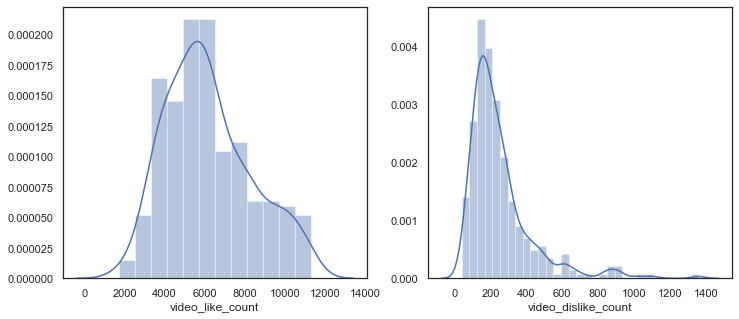

In [8]:
_, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.distplot(metas_df.video_like_count, ax=ax[0])
sns.distplot(metas_df.video_dislike_count, ax=ax[1])

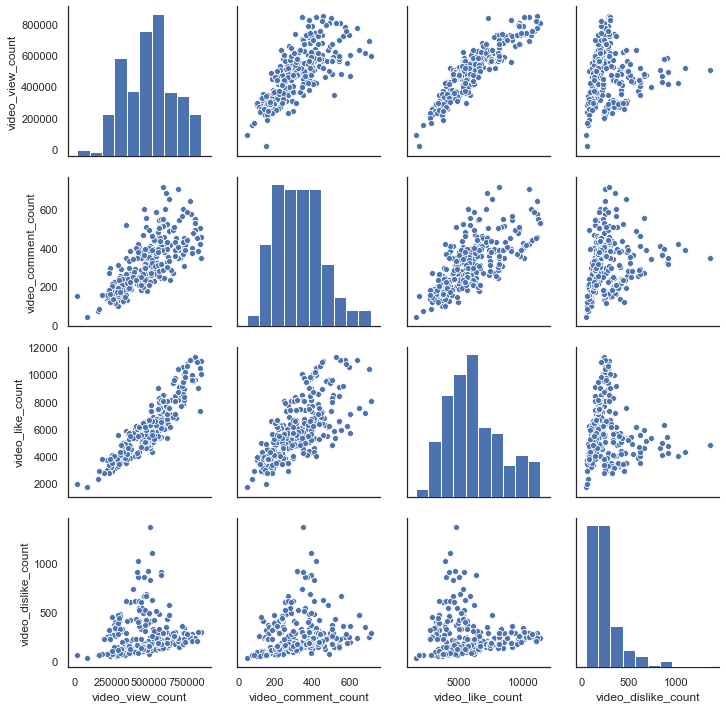

In [9]:
sns.pairplot(metas_df[counts_cols])

# comments

In [47]:
pd.DataFrame(yt.get_video_comments('Q8pmSzktX7o', get_replies=False))

,video_id,commenter_channel_url,commenter_channel_id,commenter_channel_display_name,comment_id,comment_like_count,comment_publish_date,text,commenter_rating,comment_parent_id,collection_date,reply_count
0,Q8pmSzktX7o,http://www.youtube.com/channel/UCuPUOBblvOICqQ...,UCuPUOBblvOICqQNwChGX5GA,Hoop Juice,UgyAQWhNpjM4--Ne_814AaABAg,0,2019-11-26 16:22:11,ja morant nice pass to brandon clarke dunk der...,none,None,2019-12-29 16:37:07.799770,0.0
1,Q8pmSzktX7o,http://www.youtube.com/channel/UCAerBVZPECf-yf...,UCAerBVZPECf-yfNjWCKadPw,SuperRip7,UgwFI9vArQQgZ8Y5Xt14AaABAg,0,2019-10-24 04:36:43,Soon the Season will begin.\n10-23-19.,none,None,2019-12-29 16:37:07.799862,0.0
2,Q8pmSzktX7o,http://www.youtube.com/channel/UClqzdvX9WEuUpn...,UClqzdvX9WEuUpnd4zEB0Eww,Derek Stock,UgywwHYAmFVsQC8R5yB4AaABAg,0,2019-10-22 04:44:58,@ #seavennn,none,None,2019-12-29 16:37:07.799930,0.0
3,Q8pmSzktX7o,http://www.youtube.com/channel/UC02tyjnyKxD7A0...,UC02tyjnyKxD7A0VkFkn8jZg,Bit Ray,Ugz93t20qNA5wDN4Xdp4AaABAg,0,2019-10-21 14:41:54,Voice cool😂😎👍 © Bit Ray™ 2009,none,None,2019-12-29 16:37:07.799993,0.0
4,Q8pmSzktX7o,http://www.youtube.com/channel/UCOJLMJIIqou4rr...,UCOJLMJIIqou4rrdAcUicm0Q,Da Snake 19,UgxOLJthNVtl6y-HT854AaABAg,0,2019-10-21 13:51:44,Goat mentor is back for another season YESSIR,none,None,2019-12-29 16:37:07.800043,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
278,None,http://www.youtube.com/channel/UCHgH1nIXDYmKUM...,UCHgH1nIXDYmKUMdSnHLsxdA,Clip Central,UgzxlbqjSjyomoxpMhl4AaABAg.90G4hdoZ79w90G4pjfzOM9,0,2019-10-19 06:47:57,facts,none,UgzxlbqjSjyomoxpMhl4AaABAg,2019-12-29 16:37:17.222575,NaN
279,None,http://www.youtube.com/channel/UC7o5SYV9WU4D5M...,UC7o5SYV9WU4D5MfbIhriETg,MotleyTube,UgzPlw_KV3S6cVw_2Qh4AaABAg.90G4Xix8YW-90G5PvhJdNg,0,2019-10-19 06:53:02,I've already made a video about LeBron.Can u w...,none,UgzPlw_KV3S6cVw_2Qh4AaABAg,2019-12-29 16:37:17.631917,NaN
280,None,http://www.youtube.com/channel/UC7o5SYV9WU4D5M...,UC7o5SYV9WU4D5MfbIhriETg,MotleyTube,UgxIcWcVCoLdx-wNiat4AaABAg.90G4Wbm_iuk90G7dgYkS5W,0,2019-10-19 07:12:31,@Duncan Donuts Why would u do that? :( just tr...,none,UgxIcWcVCoLdx-wNiat4AaABAg,2019-12-29 16:37:18.040708,NaN
281,None,http://www.youtube.com/channel/UCvfbLT6xsTQ5nE...,UCvfbLT6xsTQ5nED9NR72ztQ,Duncan Donuts,UgxIcWcVCoLdx-wNiat4AaABAg.90G4Wbm_iuk90G6PCKo265,2,2019-10-19 07:01:40,@MotleyTube stop commenting or else I'll repor...,none,UgxIcWcVCoLdx-wNiat4AaABAg,2019-12-29 16:37:18.040829,NaN


In [11]:
comments = []

In [14]:
print(len(comments))
for video_id in tqdm.tqdm(metas_df.video_id.iloc[len(comments):]):
    try:
        comments.append(yt.get_video_comments(video_id, get_replies=False, max_results=400))
    except Exception as e: 
        print(e)
print(len(comments))

  0%|          | 0/215 [00:00<?, ?it/s]

122


100%|██████████| 215/215 [04:28<00:00,  1.35s/it]

337


In [16]:
all_comments = sum(comments, [])
print(len(all_comments))

78130


In [17]:
df_comments = pd.DataFrame(all_comments)
print(df_comments.shape)
df_comments.head()

(78130, 12)


,video_id,commenter_channel_url,commenter_channel_id,commenter_channel_display_name,comment_id,comment_like_count,comment_publish_date,text,commenter_rating,comment_parent_id,collection_date,reply_count
0,mdFDFiFNdUg,http://www.youtube.com/channel/UChYlIA8HRJWF6I...,UChYlIA8HRJWF6IA0vOeXFdA,אריאל שטיקגולד,UgyLUAugb3JqhwWm28J4AaABAg,0,2019-04-26 07:58:00,עומריי,none,None,2019-12-30 23:48:56.122289,0
1,mdFDFiFNdUg,http://www.youtube.com/channel/UCEbWyyc0SBNVBN...,UCEbWyyc0SBNVBN2JQrek6ZA,Sports Reel,UgwIAB3KF_SgWshQkHh4AaABAg,0,2019-04-14 18:16:16,kelly oubre 0:05 josh jackson 0:19 pascal siak...,none,None,2019-12-30 23:48:56.122450,0
2,mdFDFiFNdUg,http://www.youtube.com/channel/UCq-ADgtmEduuIh...,UCq-ADgtmEduuIhfROjQBRFA,seven FangYuan,Ugza_XUyq19KjzULyVN4AaABAg,0,2018-11-10 00:43:32,💤看美女💤大尺度私🈲️视频➕微信girL6393💤过的泰国的人等待uguuu,none,None,2019-12-30 23:48:56.122549,0
3,mdFDFiFNdUg,http://www.youtube.com/channel/UC_kwzeXK_7ikgi...,UC_kwzeXK_7ikgiDdOzdQBZQ,Darth Sire,UgyXZLNHqLLIdEngTwt4AaABAg,0,2018-11-08 17:07:05,Why is the Giannis dunk at 2 and not at 1?,none,None,2019-12-30 23:48:56.122633,0
4,mdFDFiFNdUg,http://www.youtube.com/channel/UC-QSwoxh-5anPZ...,UC-QSwoxh-5anPZdCYnHXTOw,danknasty661,Ugx9XVyixTQPQR0YLz14AaABAg,0,2018-11-07 02:09:08,"Devin booker is a natural kobe, Tatum is a fak...",none,None,2019-12-30 23:48:56.122712,0


In [18]:
df_comments.to_csv('comments.csv', index=False)
df_comments.to_pickle('comments.pickle.zip', compression='zip')